<a href="https://colab.research.google.com/github/AndreiAf02/Transfer_Learning_Fine_Tuning_Update/blob/main/Simulation_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import seaborn as sns
import pandas as pd

In [17]:
path_to_data2 = 'https://raw.githubusercontent.com/AndreiAf02/Transfer_Learning_Fine_Tuning_Update/main/'

In [18]:
def perf_metrics(data, label):
    data_len = len(data)
    # print('Number of iterations:', data_len)
    mean = np.mean(data[label])
    var = np.var(data[label], ddof=1)
    var_mean = var/data_len

    se_mean = np.sqrt(var_mean)
    error_bound = 1.96*se_mean
    CI_low = mean - error_bound
    CI_high = mean + error_bound

    print('Error type:', label)
    print('Mean:', mean)
    print('Variance:', var)
    print('Variance of estimate:', var_mean)
    print('Standard error:', se_mean)
    print('95% Confidence Interval:  [', CI_low, ', ', CI_high, ']')
    print('-----------------------------')


Loading the performance data for the six sampling methods (plus original imbalanced data) collected from fine-tuning for heart disease prediction:

In [19]:
# data_orig = pd.read_csv(path_to_data2+"Sim_Imbalanced_Fine_Tuning.csv", sep=",", header=0)
# data_SRS = pd.read_csv(path_to_data2+"Sim_SRS_Fine_Tuning_Extension.csv", sep=",", header=0)
# data_SRSwR = pd.read_csv(path_to_data2+"Sim_SRSwR_Fine_Tuning_Extension.csv", sep=",", header=0)
# data_Sy = pd.read_csv(path_to_data2+"Sim_Sy_Fine_Tuning_Extension.csv", sep=",", header=0)
# data_Sym = pd.read_csv(path_to_data2+"Sim_Sy_multi_Fine_Tuning_Extension.csv", sep=",", header=0)
# data_SRS_ROS = pd.read_csv(path_to_data2+"Sim_SRS_ROS_Fine_Tuning_Extension.csv", sep=",", header=0)
# data_Sy_ROS = pd.read_csv(path_to_data2+"Sim_Sy_ROS_Fine_Tuning_Extension.csv", sep=",", header=0)


data_orig = pd.read_csv(path_to_data2+ "Sim_Imbalanced_Fine_Tuning.csv", sep=",", header=0)
data_SRS = pd.read_csv(path_to_data2+ "Sim_SRS_Fine_Tuning_Extension.csv", sep=",", header=0)
data_SRSwR = pd.read_csv(path_to_data2+ "Sim_SRSwR_Fine_Tuning_Extension.csv", sep=",", header=0)
data_Sy = pd.read_csv(path_to_data2+ "Sim_Sy_Fine_Tuning_Extension.csv", sep=",", header=0)
data_Sym = pd.read_csv(path_to_data2+ "Sim_Sy_multi_Fine_Tuning_Extension.csv", sep=",", header=0)
data_SRS_ROS = pd.read_csv(path_to_data2+ "Sim_SRS_ROS_Fine_Tuning_Extension.csv", sep=",", header=0)
data_Sy_ROS = pd.read_csv(path_to_data2+ "Sim_Sy_ROS_Fine_Tuning_Extension.csv", sep=",", header=0)



# data_orig

Original (imbalanced) data performance:

In [20]:
data_orig

,Unnamed: 0,FPR,FNR
0,0,0.035272,0.681661
1,1,0.029552,0.705882
2,2,0.023832,0.733564
3,3,0.028599,0.709343
4,4,0.023832,0.737024
...,...,...,...
95,95,0.016206,0.771626
96,96,0.035272,0.702422
97,97,0.033365,0.705882
98,98,0.033365,0.705882


Error type: FPR
Mean: 0.025757864632983744
Variance: 0.00011222685680451531
Variance of estimate: 1.1222685680451532e-06
Standard error: 0.0010593717798984231
95% Confidence Interval:  [ 0.023681495944382833 ,  0.027834233321584655 ]
-----------------------------
Error type: FNR
Mean: 0.7319031141868512
Variance: 0.0032930640198273495
Variance of estimate: 3.2930640198273495e-05
Standard error: 0.005738522475191109
95% Confidence Interval:  [ 0.7206556101354766 ,  0.7431506182382257 ]
-----------------------------


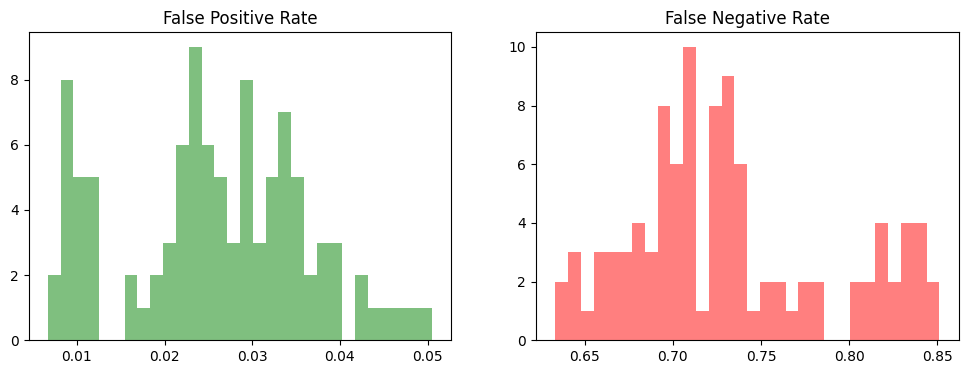

In [21]:
data = data_orig

orig_FPR = data['FPR']
orig_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

## Random Undersampling (RUS):

SRS Random Undersampling performance:

Error type: FPR
Mean: 0.11865109626955192
Variance: 0.0008052603753032327
Variance of estimate: 4.026301876516164e-06
Standard error: 0.00200656469532287
95% Confidence Interval:  [ 0.1147182294667191 ,  0.12258396307238474 ]
-----------------------------
Error type: FNR
Mean: 0.5511764705738582
Variance: 0.004217227224836241
Variance of estimate: 2.1086136124181206e-05
Standard error: 0.0045919642990969785
95% Confidence Interval:  [ 0.5421762205476282 ,  0.5601767206000883 ]
-----------------------------


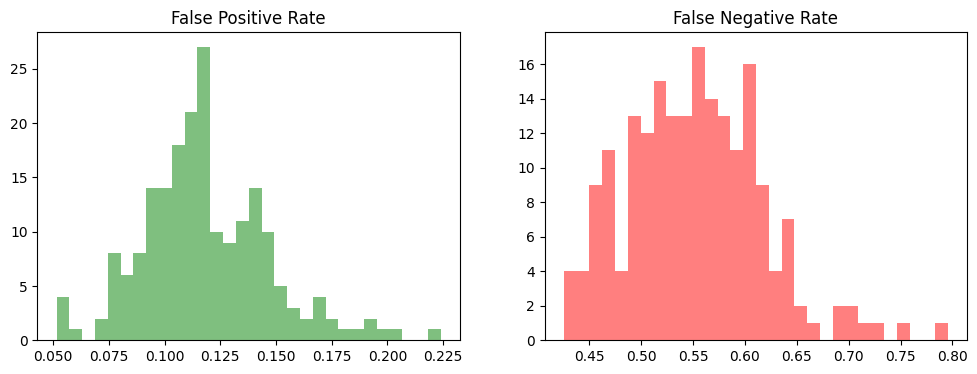

In [22]:
data = data_SRS

SRS_FPR = data['FPR']
SRS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

SRSwR undersampling performance:

Error type: FPR
Mean: 0.10657769301755955
Variance: 0.0009690574254542063
Variance of estimate: 4.8452871272710315e-06
Standard error: 0.0022012012918565696
95% Confidence Interval:  [ 0.10226333848552067 ,  0.11089204754959843 ]
-----------------------------
Error type: FNR
Mean: 0.5833044982723875
Variance: 0.007645107343400977
Variance of estimate: 3.8225536717004886e-05
Standard error: 0.006182680382892592
95% Confidence Interval:  [ 0.571186444721918 ,  0.595422551822857 ]
-----------------------------


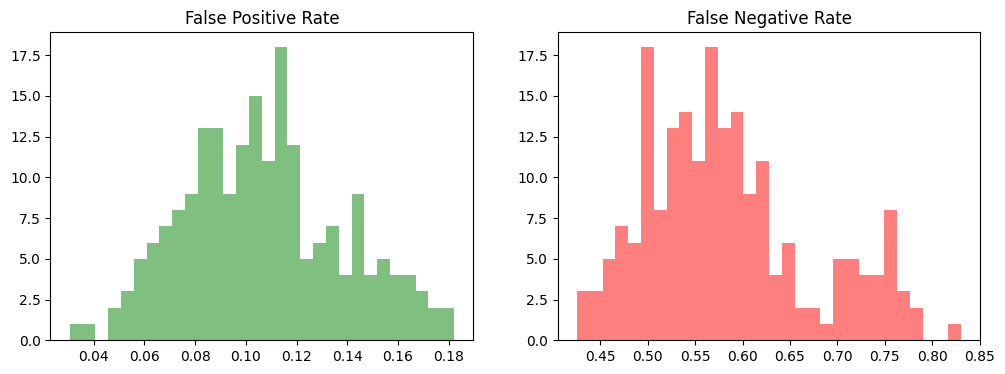

In [23]:
data = data_SRSwR

SRSwR_FPR = data['FPR']
SRSwR_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Undersampling performance:

Error type: FPR
Mean: 0.10977121066955668
Variance: 0.0008338554556674335
Variance of estimate: 4.169277278337167e-06
Standard error: 0.0020418808188376637
95% Confidence Interval:  [ 0.10576912426463486 ,  0.1137732970744785 ]
-----------------------------
Error type: FNR
Mean: 0.5718166089819723
Variance: 0.006919933596259539
Variance of estimate: 3.4599667981297695e-05
Standard error: 0.00588214824543701
95% Confidence Interval:  [ 0.5602875984209157 ,  0.5833456195430289 ]
-----------------------------


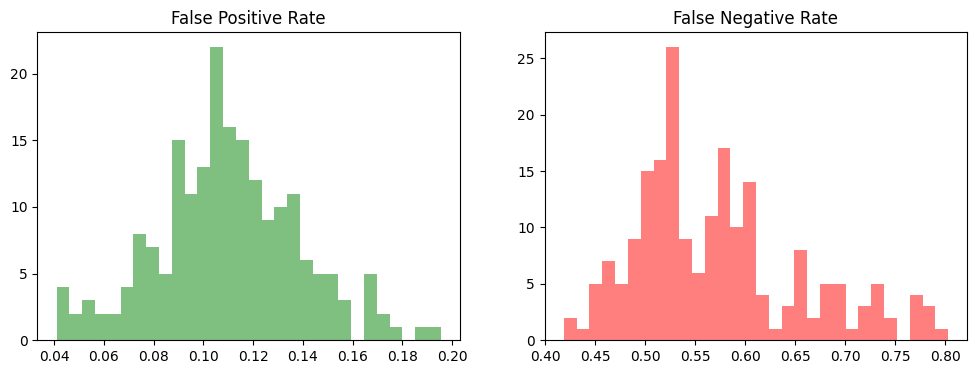

In [24]:
data = data_Sy

Sy_FPR = data['FPR']
Sy_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Multiple Systematic undersampling performance:

Error type: FPR
Mean: 0.11085319348559577
Variance: 0.0012858389532565127
Variance of estimate: 6.4291947662825635e-06
Standard error: 0.002535585685060271
95% Confidence Interval:  [ 0.10588344554287764 ,  0.11582294142831391 ]
-----------------------------
Error type: FNR
Mean: 0.581418685116263
Variance: 0.0057356152537094834
Variance of estimate: 2.867807626854742e-05
Standard error: 0.005355191524917425
95% Confidence Interval:  [ 0.5709225097274249 ,  0.5919148605051012 ]
-----------------------------


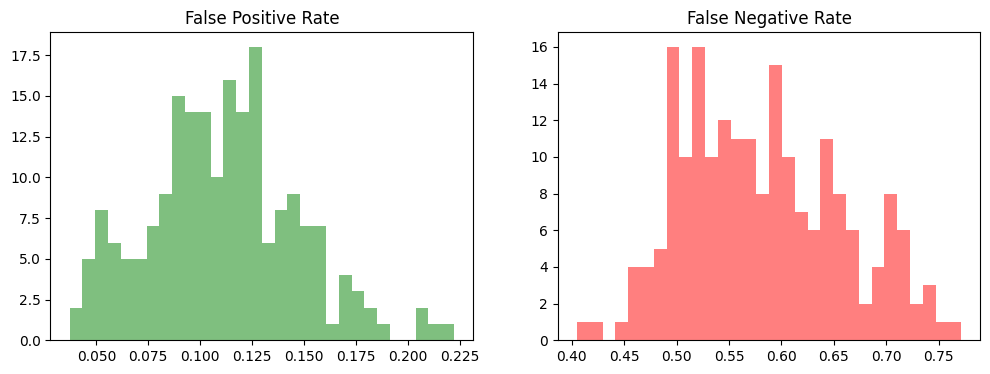

In [25]:
data = data_Sym

Sym_FPR = data['FPR']
Sym_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

## Random Oversampling (ROS):

SRS Oversampling performance:

Error type: FPR
Mean: 0.09519542419371305
Variance: 0.0006395296771909691
Variance of estimate: 3.1976483859548456e-06
Standard error: 0.0017881969650893734
95% Confidence Interval:  [ 0.09169055814213788 ,  0.09870029024528822 ]
-----------------------------
Error type: FNR
Mean: 0.5407439446322491
Variance: 0.002734658132192362
Variance of estimate: 1.367329066096181e-05
Standard error: 0.0036977412917836494
95% Confidence Interval:  [ 0.5334963717003531 ,  0.547991517564145 ]
-----------------------------


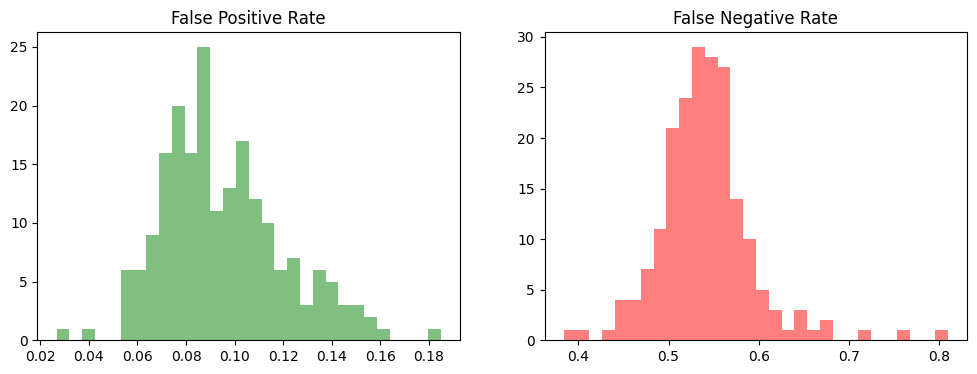

In [26]:
data = data_SRS_ROS

SRS_ROS_FPR = data['FPR']
SRS_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Resampling performance:

Error type: FPR
Mean: 0.09166348902811725
Variance: 0.0008183503498010383
Variance of estimate: 4.091751749005191e-06
Standard error: 0.002022807887320294
95% Confidence Interval:  [ 0.08769878556896947 ,  0.09562819248726502 ]
-----------------------------
Error type: FNR
Mean: 0.5647231833836505
Variance: 0.0059277117990532355
Variance of estimate: 2.9638558995266176e-05
Standard error: 0.0054441306923388765
95% Confidence Interval:  [ 0.5540526872266662 ,  0.5753936795406347 ]
-----------------------------


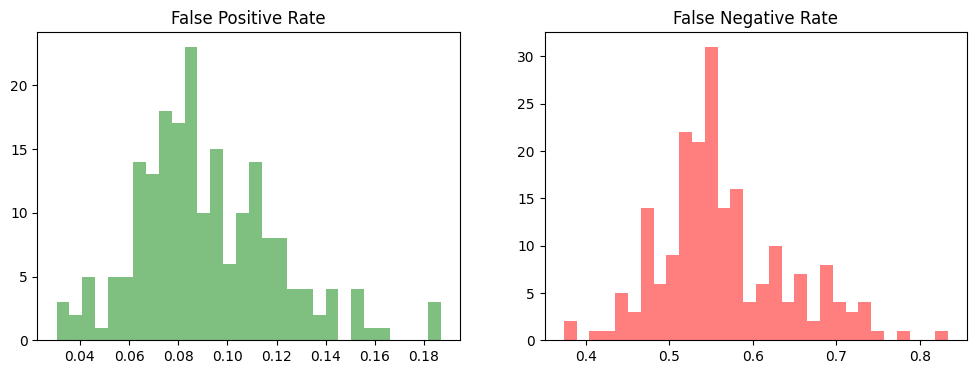

In [27]:
data = data_Sy_ROS

Sy_ROS_FPR = data['FPR']
Sy_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

In [28]:
FPR = pd.DataFrame()

DF = FPR


DF['SRS_RUS'] = SRS_FPR
DF['SRSwR_RUS'] = SRSwR_FPR
DF['Sy_RUS'] = Sy_FPR
DF['Sy_m_RUS'] = Sym_FPR
DF['SRS_ROS'] = SRS_ROS_FPR
DF['Sy_ROS'] = Sy_ROS_FPR
DF['Orig'] = orig_FPR
FPR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.141087,0.118208,0.113441,0.107722,0.101049,0.095329,0.035272
1,0.144900,0.115348,0.119161,0.122021,0.088656,0.081983,0.029552
2,0.148713,0.169685,0.090562,0.102955,0.055291,0.063870,0.023832
3,0.114395,0.108675,0.137274,0.087703,0.111535,0.099142,0.028599
4,0.125834,0.122021,0.091516,0.091516,0.133460,0.095329,0.023832
...,...,...,...,...,...,...,...
195,0.139180,0.086749,0.111535,0.125834,0.158246,0.080076,NaN
196,0.124881,0.146806,0.087703,0.136320,0.089609,0.122021,NaN
197,0.131554,0.069590,0.099142,0.147760,0.142040,0.056244,NaN
198,0.103908,0.119161,0.110582,0.073403,0.130601,0.115348,NaN


<Axes: title={'center': 'FPR'}>

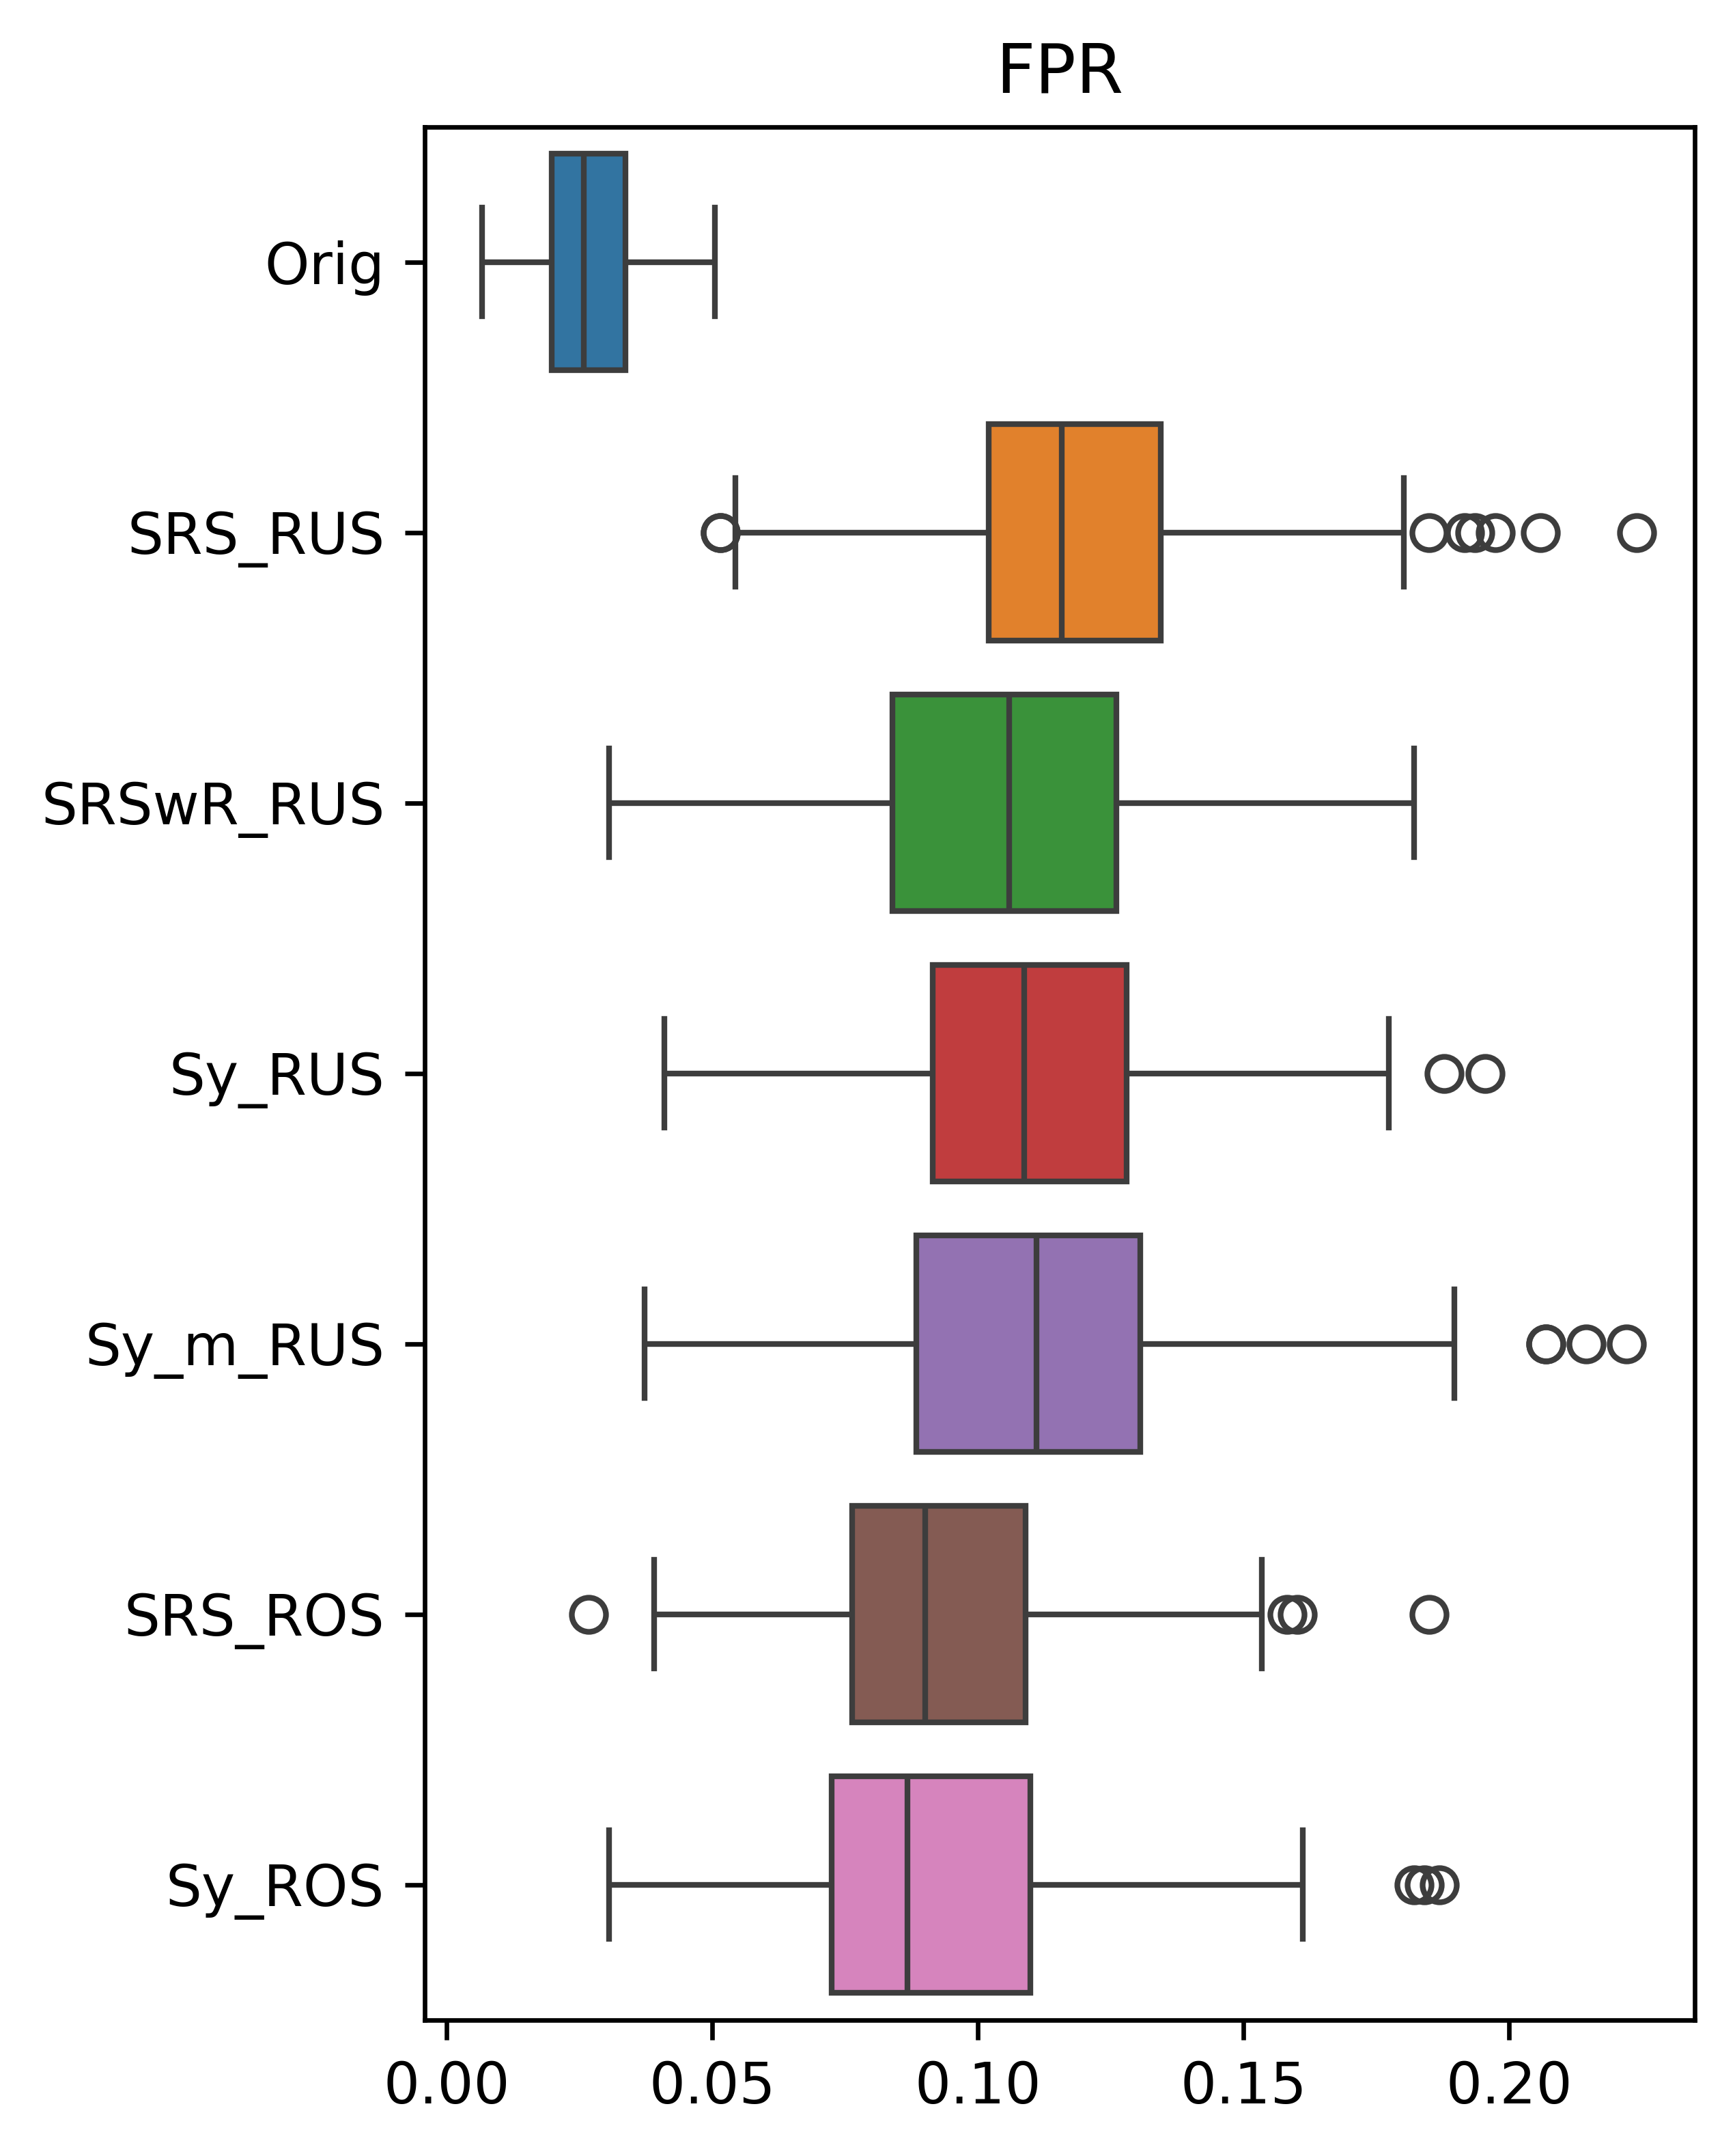

In [29]:
dataset = FPR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FPR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [30]:
FNR = pd.DataFrame()

DF = FNR


DF['SRS_RUS'] = SRS_FNR
DF['SRSwR_RUS'] = SRSwR_FNR
DF['Sy_RUS'] = Sy_FNR
DF['Sy_m_RUS'] = Sym_FNR
DF['SRS_ROS'] = SRS_ROS_FNR
DF['Sy_ROS'] = Sy_ROS_FNR
DF['Orig'] = orig_FNR
FNR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.522491,0.591696,0.512111,0.508651,0.519031,0.557093,0.681661
1,0.519031,0.588235,0.501730,0.494810,0.536332,0.570934,0.705882
2,0.515571,0.498270,0.595156,0.529412,0.602076,0.626298,0.733564
3,0.591696,0.608997,0.480969,0.546713,0.498270,0.553633,0.709343
4,0.564014,0.577855,0.598616,0.543253,0.480969,0.557093,0.737024
...,...,...,...,...,...,...,...
195,0.456747,0.598616,0.543253,0.608997,0.529412,0.574394,NaN
196,0.470588,0.463668,0.591696,0.595156,0.653979,0.508651,NaN
197,0.463668,0.622837,0.570934,0.577855,0.581315,0.626298,NaN
198,0.501730,0.522491,0.532872,0.712803,0.567474,0.522491,NaN


<Axes: title={'center': 'FNR'}>

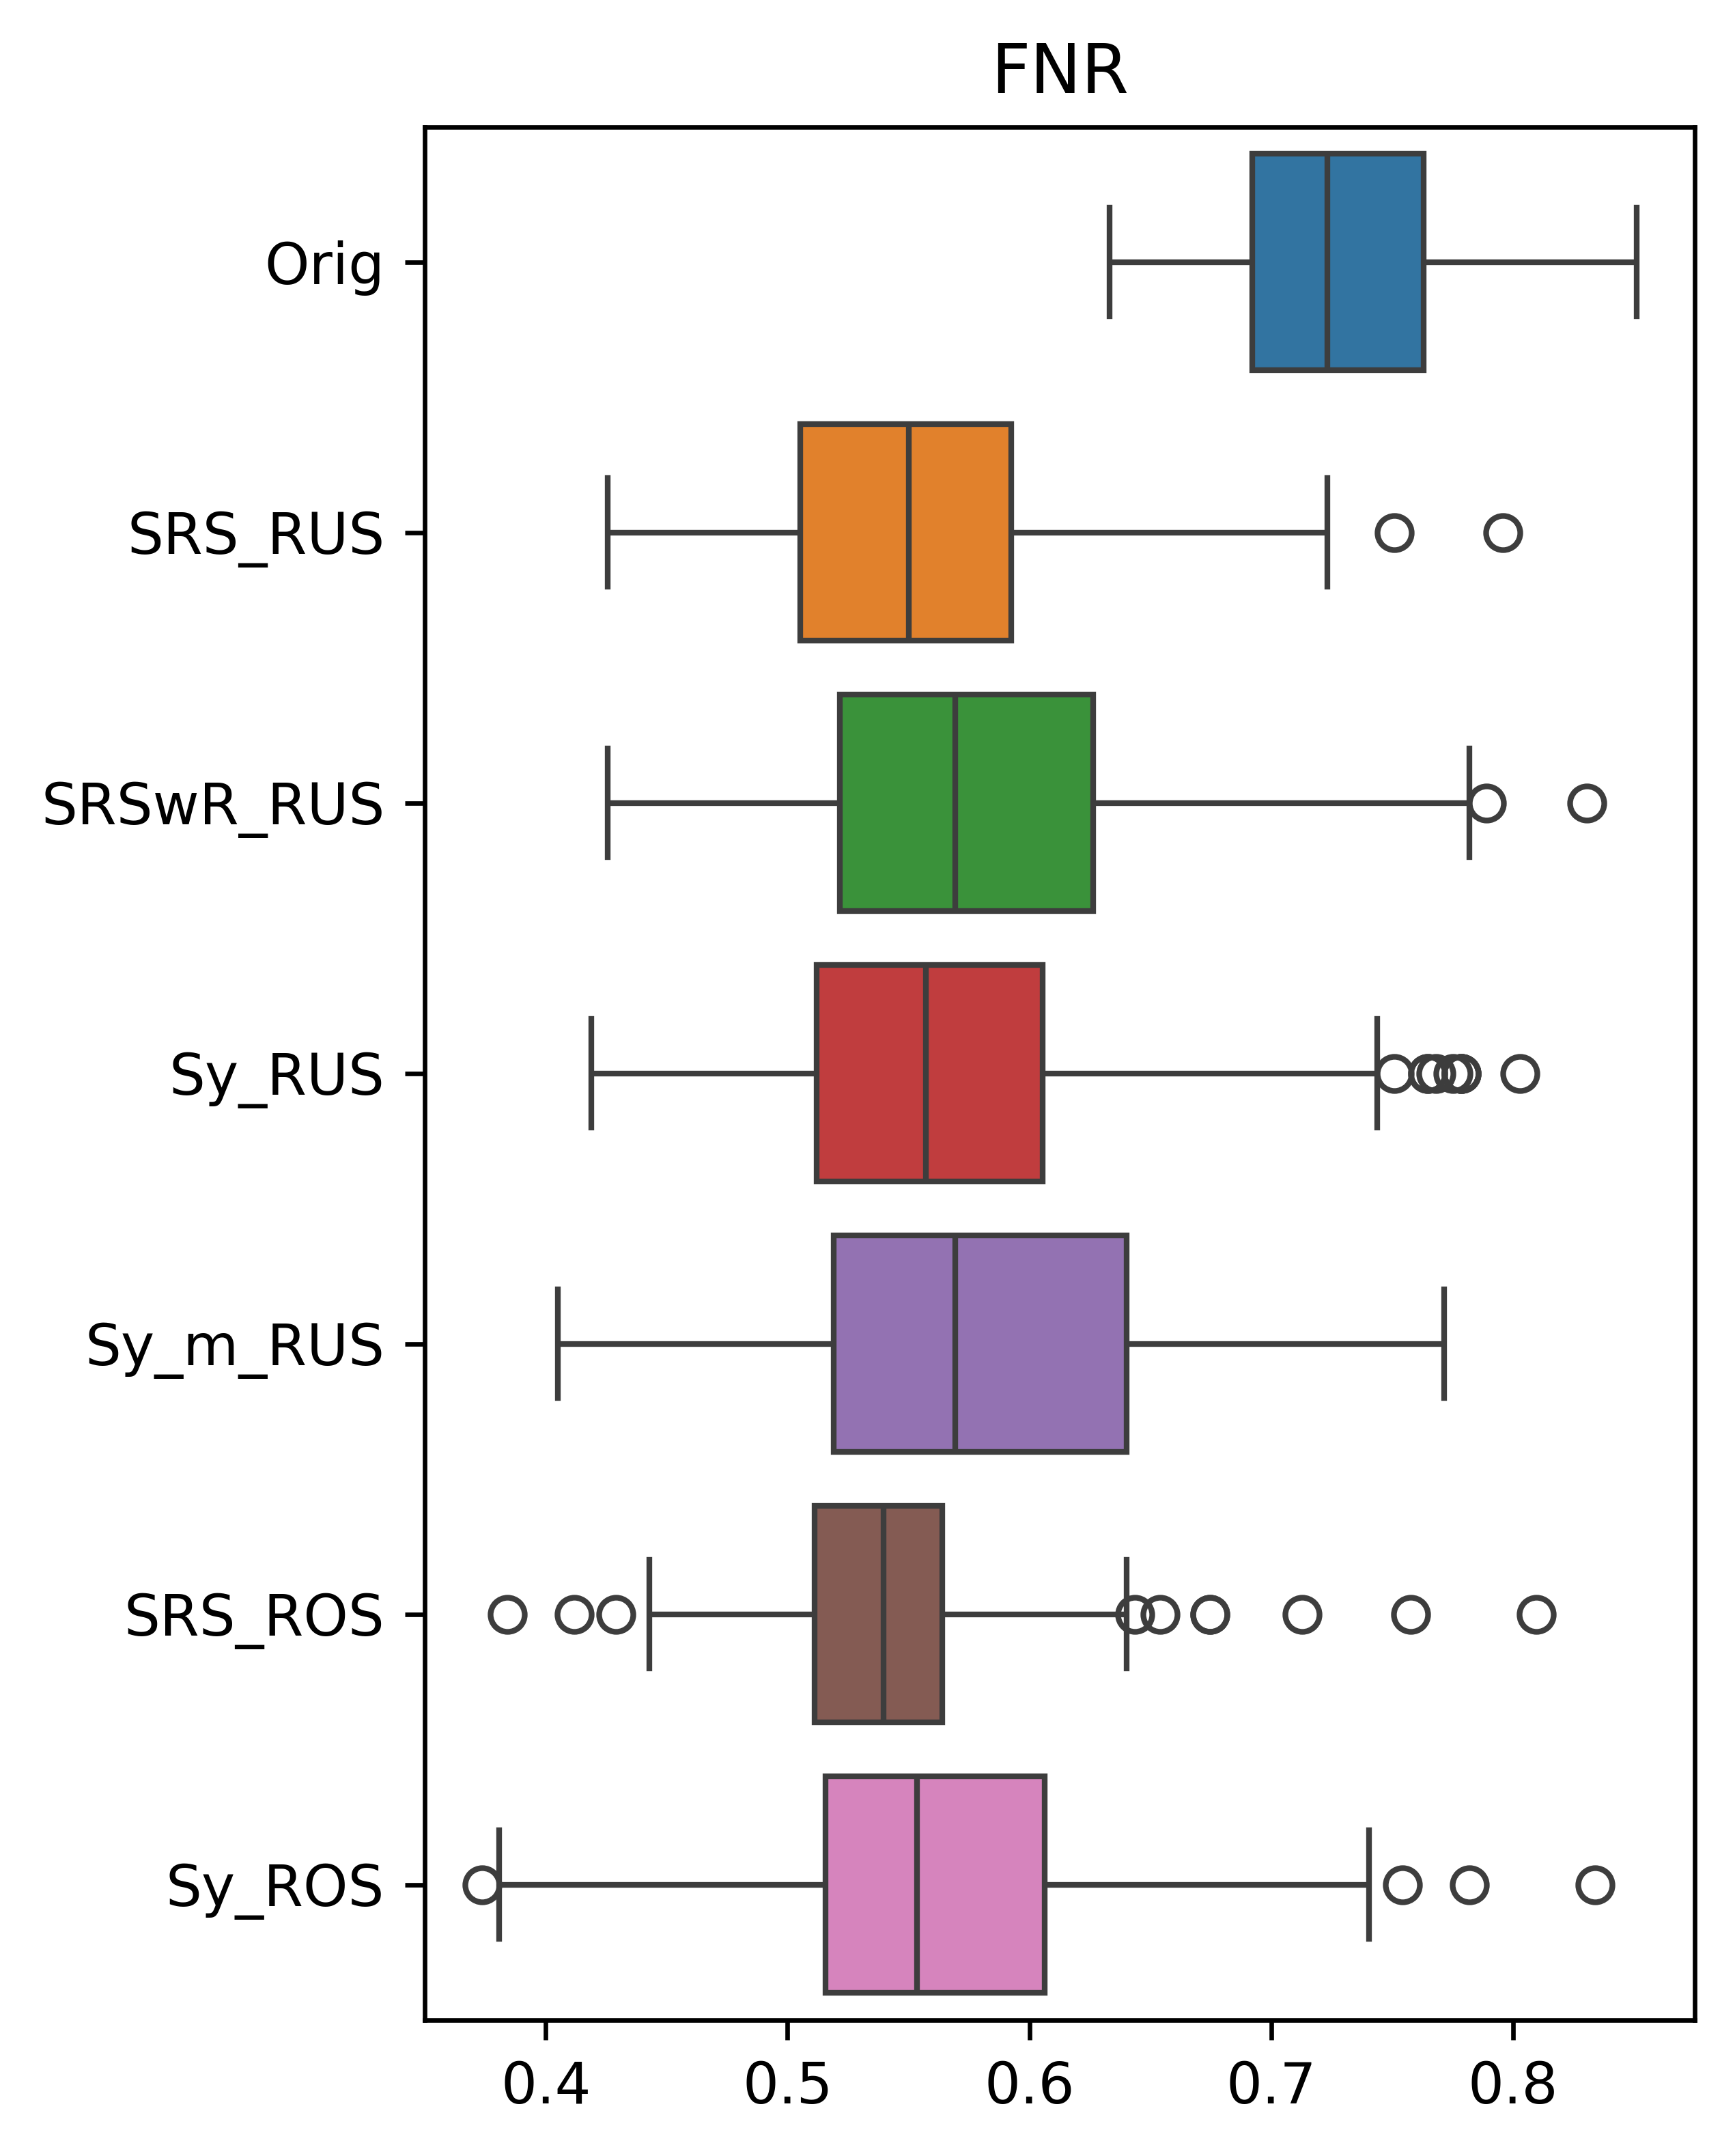

In [31]:
dataset = FNR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FNR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

## Transductive TL performance:

In [ ]:
data_orig = pd.read_csv(path_to_data2+"Adult_Imbalanced.csv", sep=",", header=0)
data_SRS = pd.read_csv(path_to_data2+"Adult_SRS_RUS_Extended.csv", sep=",", header=0)
data_SRSwR = pd.read_csv(path_to_data2+"Adult_SRSwR_RUS_Extended.csv", sep=",", header=0)
data_Sy = pd.read_csv(path_to_data2+"Adult_Sy_RUS_Extended.csv", sep=",", header=0)
data_Sy2 = pd.read_csv(path_to_data2+"Adult_Sy2_RUS_Extended.csv", sep=",", header=0)
data_SRS_ROS = pd.read_csv(path_to_data2+"Adult_SRS_ROS_Extended.csv", sep=",", header=0)
data_Sy_ROS = pd.read_csv(path_to_data2+"Adult_Sy_ROS_Extended.csv", sep=",", header=0)

data_SRS

,Unnamed: 0,Source time,FPR,TPR,FNR,TNR,Target time
0,0,18.303071,0.124892,0.506336,0.493664,0.875108,1.793025
1,1,16.633857,0.223114,0.635945,0.364055,0.776886,1.199840
2,2,17.355280,0.032765,0.392857,0.607143,0.967235,1.715382
3,3,18.062277,0.062303,0.338710,0.661290,0.937697,1.207519
4,4,15.994438,0.054130,0.516129,0.483871,0.945870,1.779479
...,...,...,...,...,...,...,...
95,45,26.469433,0.121881,0.685484,0.314516,0.878119,1.935004
96,46,30.762998,0.003226,0.139401,0.860599,0.996774,1.749799
97,47,29.523205,0.009607,0.285138,0.714862,0.990393,2.137029
98,48,27.659301,0.004588,0.228111,0.771889,0.995412,2.217738


Original (imbalanced) dataset:

In [ ]:
print('SRS RUS', len(data_SRS))
print('SRSwR RUS', len(data_SRSwR))
print('Sy RUS', len(data_Sy))
print('Sym RUS', len(data_Sy2))
print('SRS ROS', len(data_SRS_ROS))
print('Sy ROS', len(data_Sy_ROS))



SRS RUS 100
SRSwR RUS 100
Sy RUS 100
Sym RUS 100
SRS ROS 100
Sy ROS 100


In [ ]:
orig_FPR = data_orig['FPR']
orig_FNR = data_orig['FNR']
orig_time = data_orig['Source time']


Error type: FPR
Mean: 0.026780900487525044
Variance: 0.002291315120351748
Variance of estimate: 4.582630240703496e-05
Standard error: 0.006769512715626949
95% Confidence Interval:  [ 0.013512655564896224 ,  0.040049145410153864 ]
-----------------------------
Error type: FNR
Mean: 0.7438824884792626
Variance: 0.02575224046540615
Variance of estimate: 0.000515044809308123
Standard error: 0.022694598681362994
95% Confidence Interval:  [ 0.6994010750637911 ,  0.7883639018947342 ]
-----------------------------
Error type: Source time
Mean: 31.093334453439958
Variance: 28.537780406576783
Variance of estimate: 0.5707556081315357
Standard error: 0.7554836915060018
95% Confidence Interval:  [ 29.612586418088195 ,  32.574082488791724 ]
-----------------------------


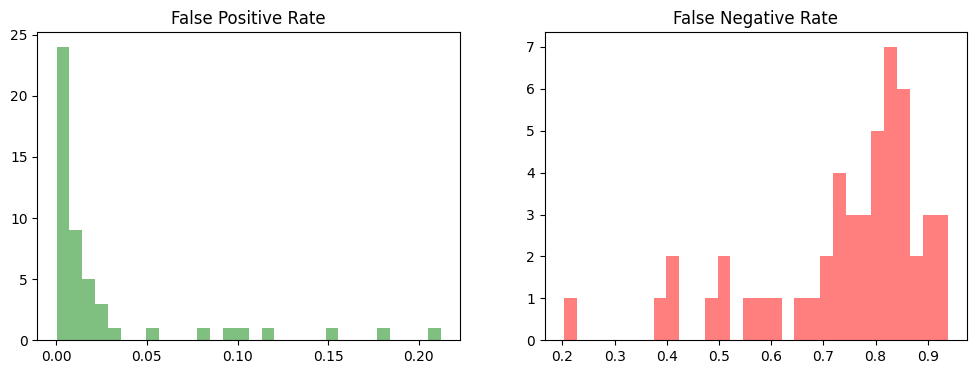

In [ ]:
data = data_orig

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

##Random Undersampling (RUS):

SRS undersampling performance:

Error type: FPR
Mean: 0.05816317750000285
Variance: 0.005806332764895927
Variance of estimate: 5.806332764895927e-05
Standard error: 0.0076199296354336025
95% Confidence Interval:  [ 0.04322811541455299 ,  0.07309823958545271 ]
-----------------------------
Error type: FNR
Mean: 0.6320046082840092
Variance: 0.03987724486835674
Variance of estimate: 0.0003987724486835674
Standard error: 0.0199692876358564
95% Confidence Interval:  [ 0.5928648045177306 ,  0.6711444120502877 ]
-----------------------------
Error type: Source time
Mean: 23.55826406953004
Variance: 12.974560924647895
Variance of estimate: 0.12974560924647893
Standard error: 0.36020217829224593
95% Confidence Interval:  [ 22.85226780007724 ,  24.26426033898284 ]
-----------------------------


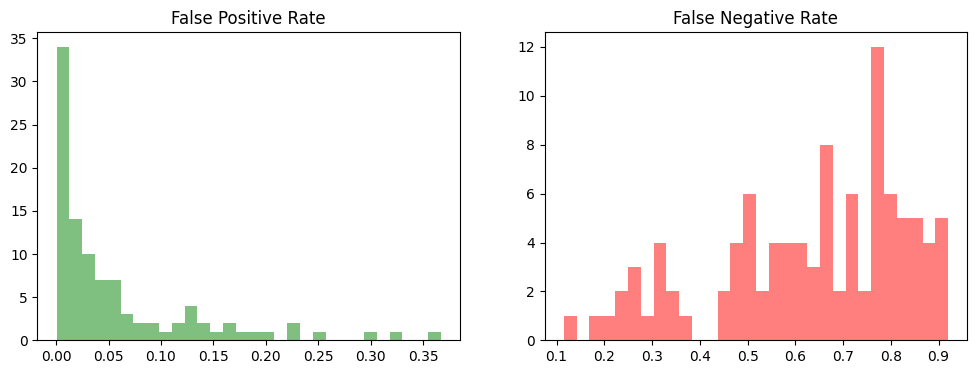

In [ ]:
data = data_SRS

SRS_FPR = data['FPR']
SRS_FNR = data['FNR']
SRS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

SRSwR Undersampling performance:

Error type: FPR
Mean: 0.06733725263455118
Variance: 0.013150712693856724
Variance of estimate: 0.00013150712693856724
Standard error: 0.011467655686258078
95% Confidence Interval:  [ 0.044860647489485345 ,  0.089813857779617 ]
-----------------------------
Error type: FNR
Mean: 0.6250864055187556
Variance: 0.05169338546222686
Variance of estimate: 0.0005169338546222686
Standard error: 0.022736179420084383
95% Confidence Interval:  [ 0.5805234938553903 ,  0.669649317182121 ]
-----------------------------
Error type: Source time
Mean: 22.80153695944
Variance: 12.420702243012961
Variance of estimate: 0.12420702243012961
Standard error: 0.35243016674247624
95% Confidence Interval:  [ 22.110773832624748 ,  23.492300086255252 ]
-----------------------------


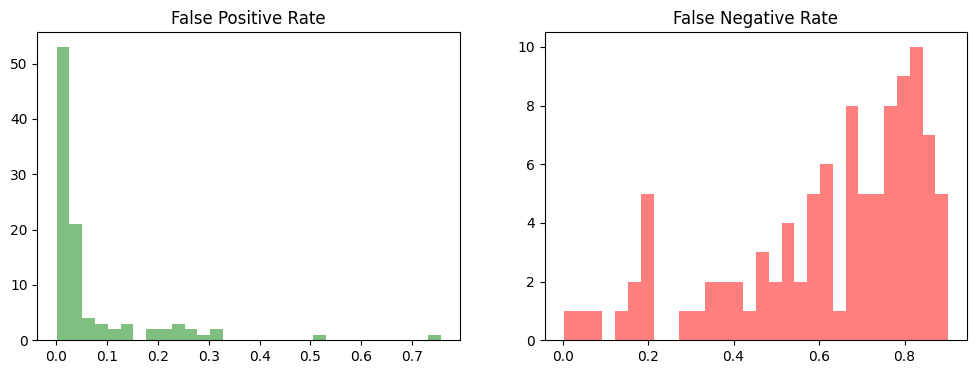

In [ ]:
data = data_SRSwR

SRSwR_FPR = data['FPR']
SRSwR_FNR = data['FNR']
SRSwR_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Systematic Undersampling performance:

Error type: FPR
Mean: 0.05124677376065384
Variance: 0.006610672732790344
Variance of estimate: 6.610672732790344e-05
Standard error: 0.00813060436424645
95% Confidence Interval:  [ 0.035310789206730794 ,  0.06718275831457689 ]
-----------------------------
Error type: FNR
Mean: 0.6648329493178341
Variance: 0.03916784817638048
Variance of estimate: 0.00039167848176380475
Standard error: 0.019790868646014623
95% Confidence Interval:  [ 0.6260428467716455 ,  0.7036230518640227 ]
-----------------------------
Error type: Source time
Mean: 23.010542003650027
Variance: 10.333364818041618
Variance of estimate: 0.10333364818041618
Standard error: 0.321455515087883
95% Confidence Interval:  [ 22.380489194077775 ,  23.64059481322228 ]
-----------------------------


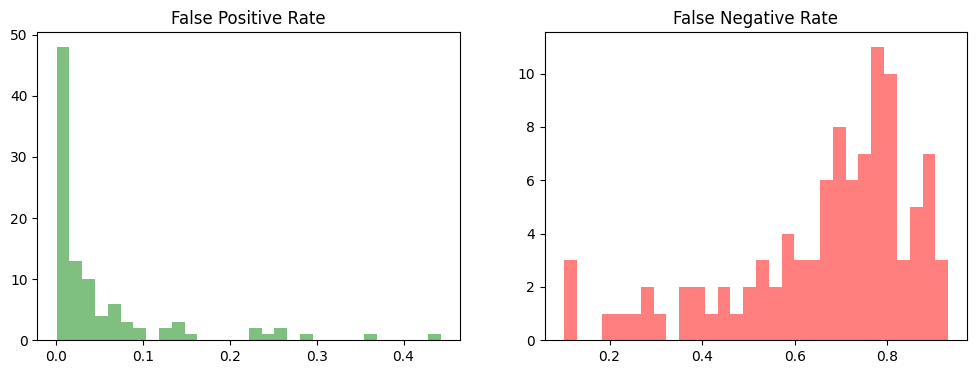

In [ ]:
data = data_Sy

Sy_FPR = data['FPR']
Sy_FNR = data['FNR']
Sy_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Multiple Systematic Undersampling performance:

In [ ]:
data_Sy2

,Unnamed: 0,Source time,FPR,TNR,FNR,TPR,Target time
0,0,15.716550,0.004373,0.995627,0.820853,0.179147,1.162152
1,1,16.782630,0.006883,0.993117,0.854839,0.145161,1.812456
2,2,17.794265,0.001075,0.998925,0.904378,0.095622,1.299881
3,3,15.260581,0.067752,0.932248,0.482719,0.517281,1.780965
4,4,17.468869,0.084600,0.915400,0.509217,0.490783,1.196778
...,...,...,...,...,...,...,...
95,45,25.945357,0.073631,0.926369,0.432028,0.567972,1.894543
96,46,26.598388,0.043519,0.956481,0.550115,0.449885,1.779075
97,47,25.674172,0.018282,0.981718,0.714286,0.285714,1.563924
98,48,24.195498,0.004875,0.995125,0.804147,0.195853,3.031811


Error type: FPR
Mean: 0.0666812446575939
Variance: 0.01128577281839628
Variance of estimate: 0.0001128577281839628
Standard error: 0.010623451801743292
95% Confidence Interval:  [ 0.045859279126177044 ,  0.08750321018901075 ]
-----------------------------
Error type: FNR
Mean: 0.6188076036766821
Variance: 0.04439113345687525
Variance of estimate: 0.00044391133456875254
Standard error: 0.021069203463082144
95% Confidence Interval:  [ 0.5775119648890411 ,  0.6601032424643231 ]
-----------------------------
Error type: Source time
Mean: 23.793176767679952
Variance: 22.866981645982776
Variance of estimate: 0.22866981645982776
Standard error: 0.4781943291799138
95% Confidence Interval:  [ 22.85591588248732 ,  24.730437652872585 ]
-----------------------------


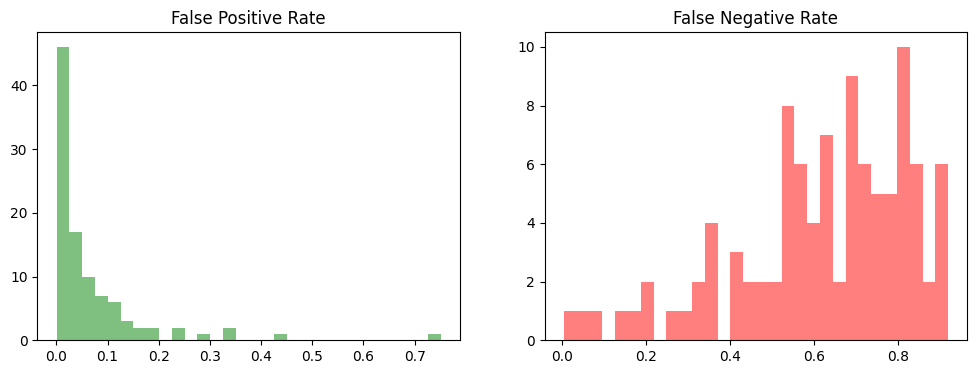

In [ ]:
data = data_Sy2

Sy2_FPR = data['FPR']
Sy2_FNR = data['FNR']
Sy2_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

## Random Oversampling (ROS):

SRS Oversampling performance:

Error type: FPR
Mean: 0.06046673360235445
Variance: 0.0062405603212161015
Variance of estimate: 6.240560321216102e-05
Standard error: 0.00789972171738733
95% Confidence Interval:  [ 0.04498327903627529 ,  0.07595018816843362 ]
-----------------------------
Error type: FNR
Mean: 0.6204320276610138
Variance: 0.03974863024890589
Variance of estimate: 0.0003974863024890589
Standard error: 0.019937058521483527
95% Confidence Interval:  [ 0.581355392958906 ,  0.6595086623631216 ]
-----------------------------
Error type: Source time
Mean: 46.13460133040998
Variance: 36.374527845635534
Variance of estimate: 0.36374527845635535
Standard error: 0.603112989792423
95% Confidence Interval:  [ 44.95249987041683 ,  47.31670279040313 ]
-----------------------------


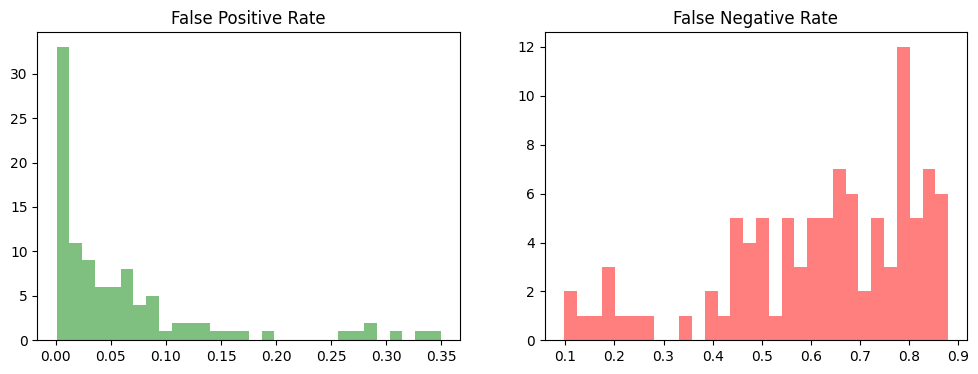

In [ ]:
data = data_SRS_ROS

SRS_ROS_FPR = data['FPR']
SRS_ROS_FNR = data['FNR']
SRS_ROS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Systematic Resampling performance:

In [ ]:
data_Sy_ROS

,Unnamed: 0,Source time,FPR,TNR,FNR,TPR,Target time
0,0,36.675036,0.023301,0.976699,0.740783,0.259217,1.671912
1,1,35.367708,0.254373,0.745627,0.115783,0.884217,1.161786
2,2,47.703464,0.025738,0.974262,0.659562,0.340438,1.237285
3,3,36.282060,0.016777,0.983223,0.657834,0.342166,1.228638
4,4,39.698375,0.004373,0.995627,0.833525,0.166475,1.247540
...,...,...,...,...,...,...,...
95,45,51.294530,0.072484,0.927516,0.588710,0.411290,3.055822
96,46,49.584492,0.124606,0.875394,0.407834,0.592166,1.873747
97,47,66.481690,0.051047,0.948953,0.588710,0.411290,1.896121
98,48,50.759811,0.022297,0.977703,0.714286,0.285714,1.561452


Error type: FPR
Mean: 0.04692500720962143
Variance: 0.004473385028053446
Variance of estimate: 4.473385028053446e-05
Standard error: 0.006688336884497854
95% Confidence Interval:  [ 0.03381586691600563 ,  0.060034147503237226 ]
-----------------------------
Error type: FNR
Mean: 0.6594066820278802
Variance: 0.03310751212156604
Variance of estimate: 0.0003310751212156604
Standard error: 0.01819546979925664
95% Confidence Interval:  [ 0.6237435612213372 ,  0.6950698028344232 ]
-----------------------------
Error type: Source time
Mean: 46.60815512315994
Variance: 33.318145227799846
Variance of estimate: 0.33318145227799845
Standard error: 0.5772187213509264
95% Confidence Interval:  [ 45.47680642931212 ,  47.73950381700776 ]
-----------------------------


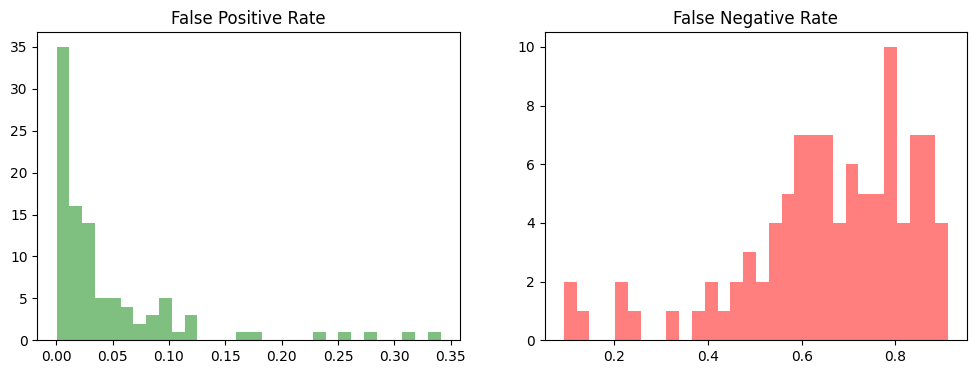

In [ ]:
data = data_Sy_ROS

Sy_ROS_FPR = data['FPR']
Sy_ROS_FNR = data['FNR']
Sy_ROS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

In [ ]:
FPR = pd.DataFrame()

DF = FPR


DF['SRS_RUS'] = SRS_FPR
DF['SRSwR_RUS'] = SRSwR_FPR
DF['Sy_RUS'] = Sy_FPR
DF['Sy_m_RUS'] = Sy2_FPR
DF['SRS_ROS'] = SRS_ROS_FPR
DF['Sy_ROS'] = Sy_ROS_FPR
DF['Orig'] = orig_FPR
FPR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.124892,0.020433,0.071910,0.004373,0.272942,0.023301,0.013622
1,0.223114,0.002007,0.014482,0.006883,0.001362,0.254373,0.004947
2,0.032765,0.040436,0.001219,0.001075,0.077287,0.025738,0.014411
3,0.062303,0.028248,0.003872,0.067752,0.013622,0.016777,0.004804
4,0.054130,0.032836,0.293877,0.084600,0.006381,0.004373,0.003513
...,...,...,...,...,...,...,...
95,0.121881,0.013192,0.016418,0.073631,0.052122,0.072484,NaN
96,0.003226,0.007456,0.031331,0.043519,0.001362,0.124606,NaN
97,0.009607,0.039432,0.263048,0.018282,0.114425,0.051047,NaN
98,0.004588,0.023659,0.136866,0.004875,0.084026,0.022297,NaN


<Axes: title={'center': 'FPR'}>

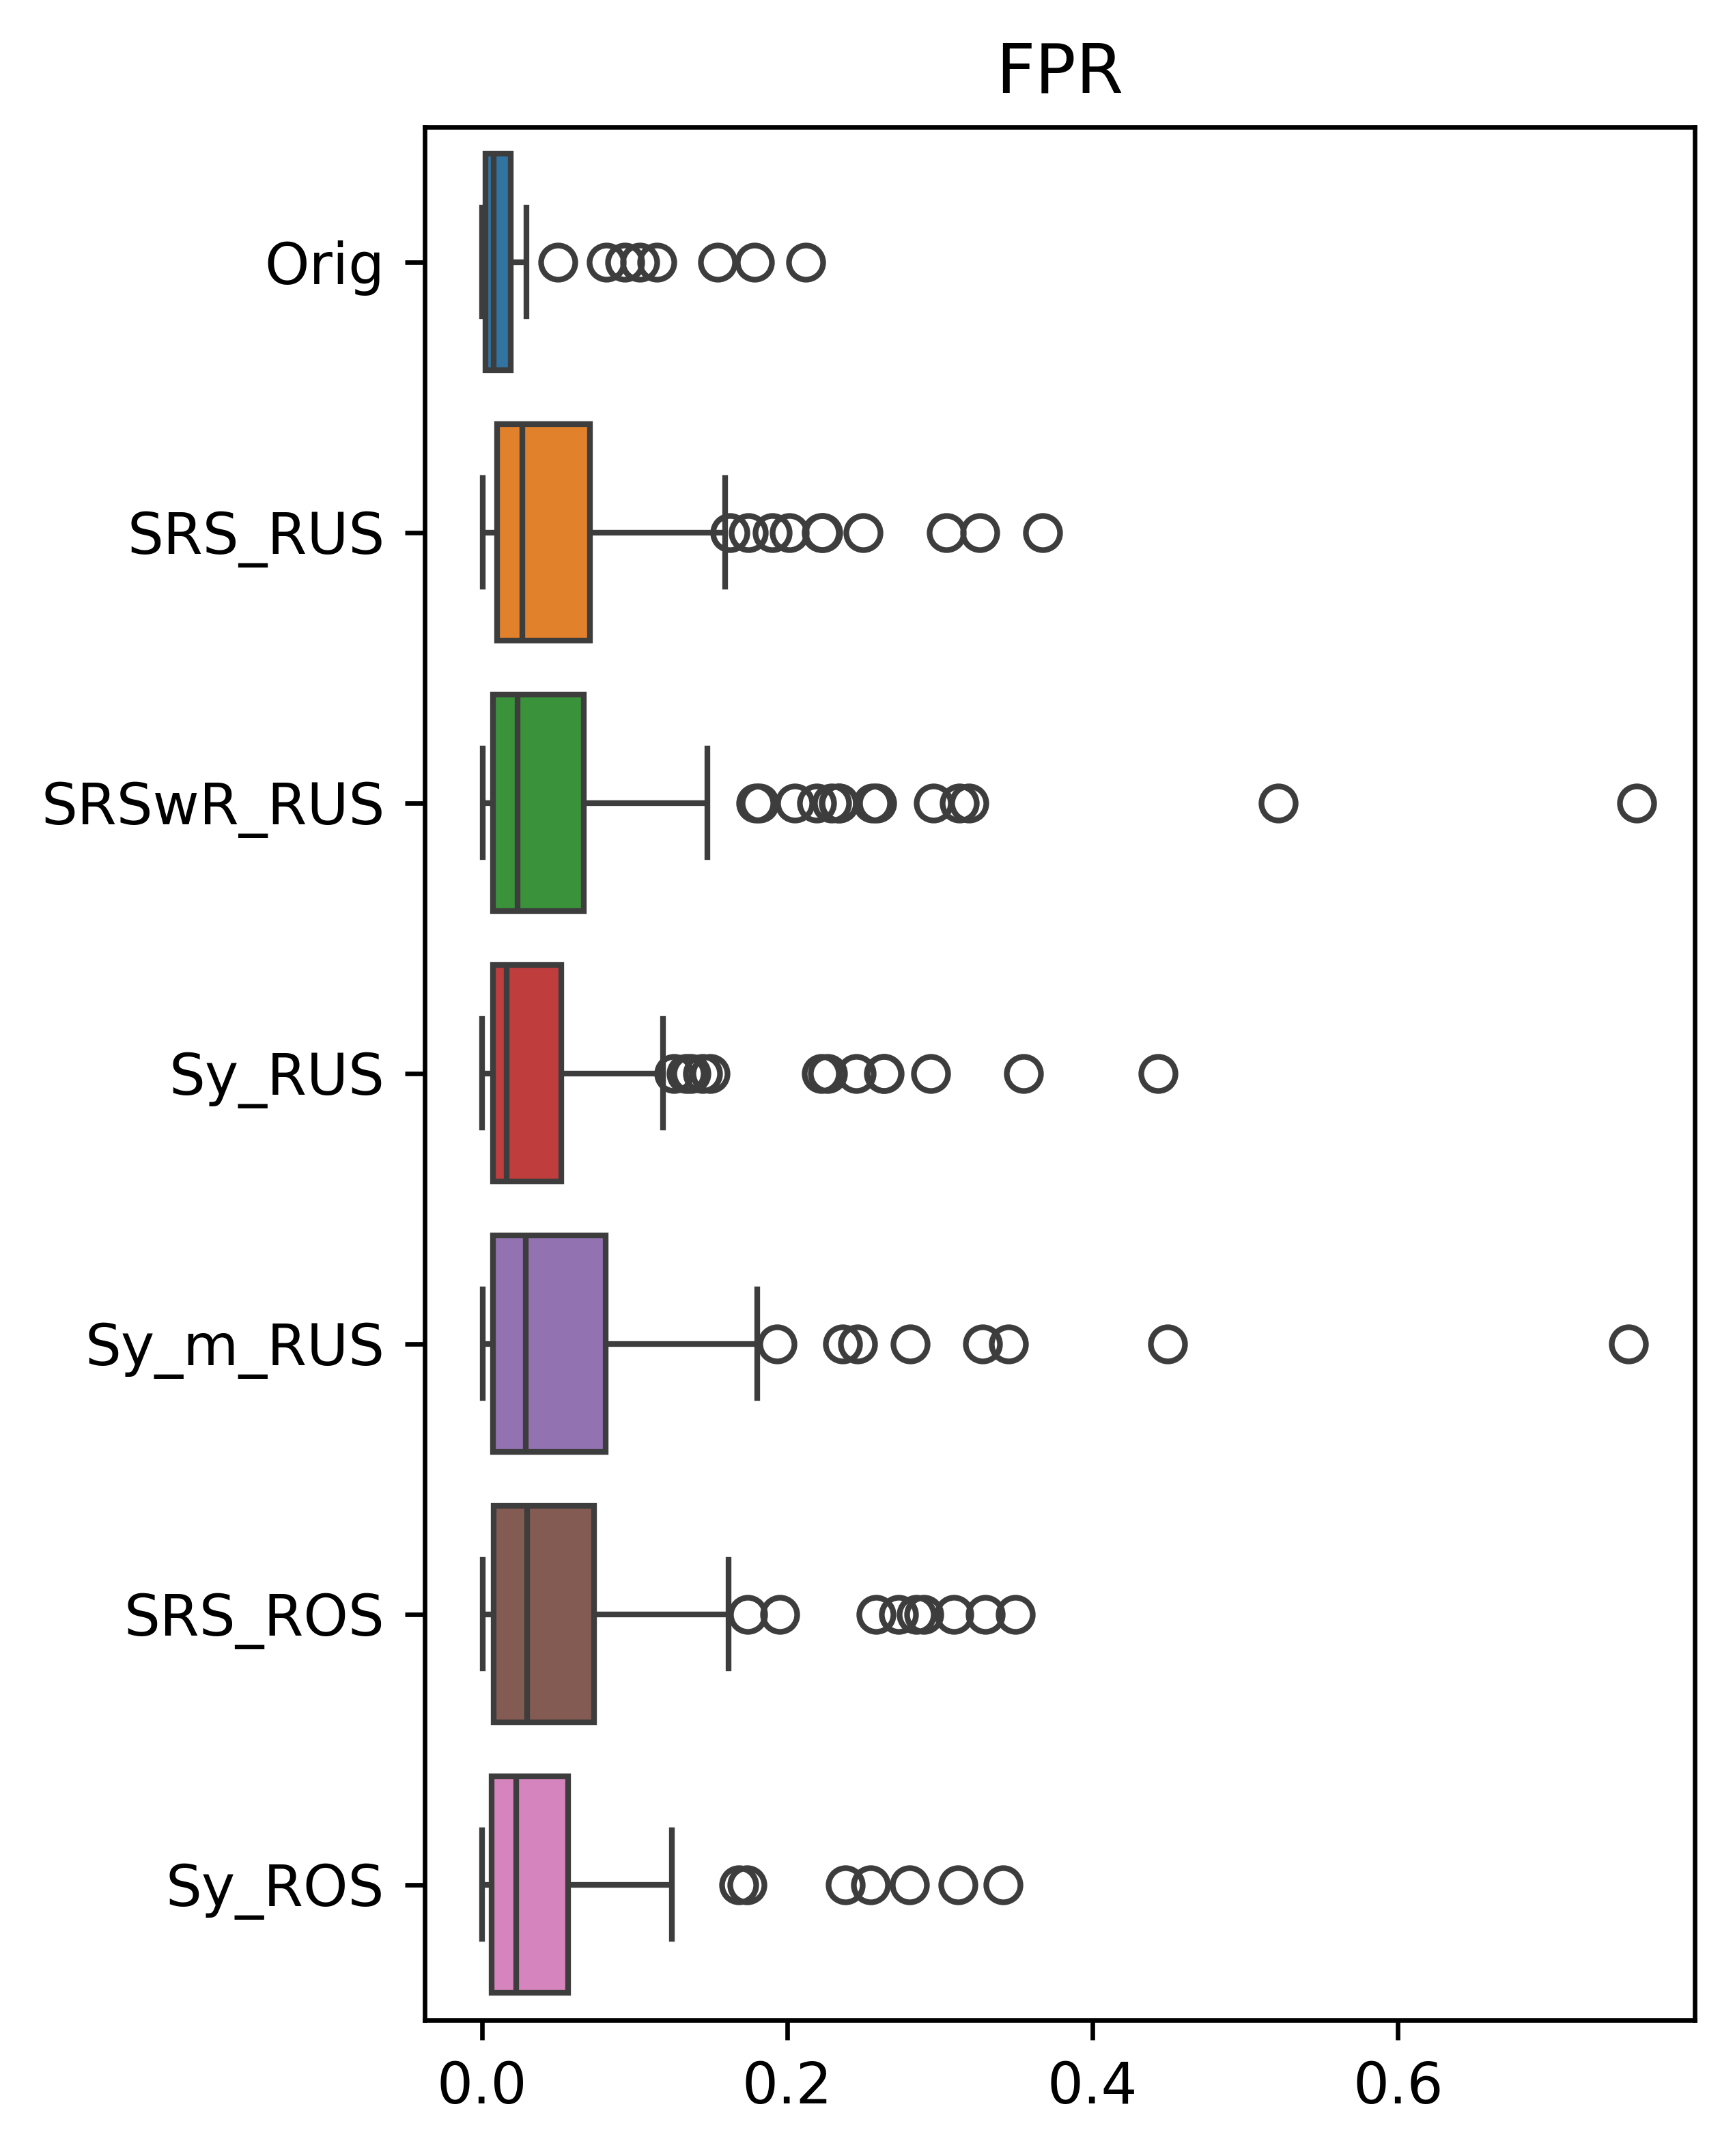

In [ ]:
dataset = FPR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FPR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [ ]:
FNR = pd.DataFrame()

DF = FNR


DF['SRS_RUS'] = SRS_FNR
DF['SRSwR_RUS'] = SRSwR_FNR
DF['Sy_RUS'] = Sy_FNR
DF['Sy_m_RUS'] = Sy2_FNR
DF['SRS_ROS'] = SRS_ROS_FNR
DF['Sy_ROS'] = Sy_ROS_FNR
DF['Orig'] = orig_FNR
FNR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.493664,0.691820,0.383641,0.820853,0.191244,0.740783,0.667051
1,0.364055,0.835253,0.751152,0.854839,0.869816,0.115783,0.828917
2,0.607143,0.581797,0.911290,0.904378,0.515553,0.659562,0.738479
3,0.661290,0.692396,0.853111,0.482719,0.730991,0.657834,0.819124
4,0.483871,0.679724,0.226959,0.509217,0.844470,0.833525,0.865207
...,...,...,...,...,...,...,...
95,0.314516,0.705069,0.724654,0.432028,0.513249,0.588710,NaN
96,0.860599,0.827189,0.641705,0.550115,0.880184,0.407834,NaN
97,0.714862,0.538018,0.289171,0.714286,0.354263,0.588710,NaN
98,0.771889,0.671659,0.283986,0.804147,0.592742,0.714286,NaN


<Axes: title={'center': 'FNR'}>

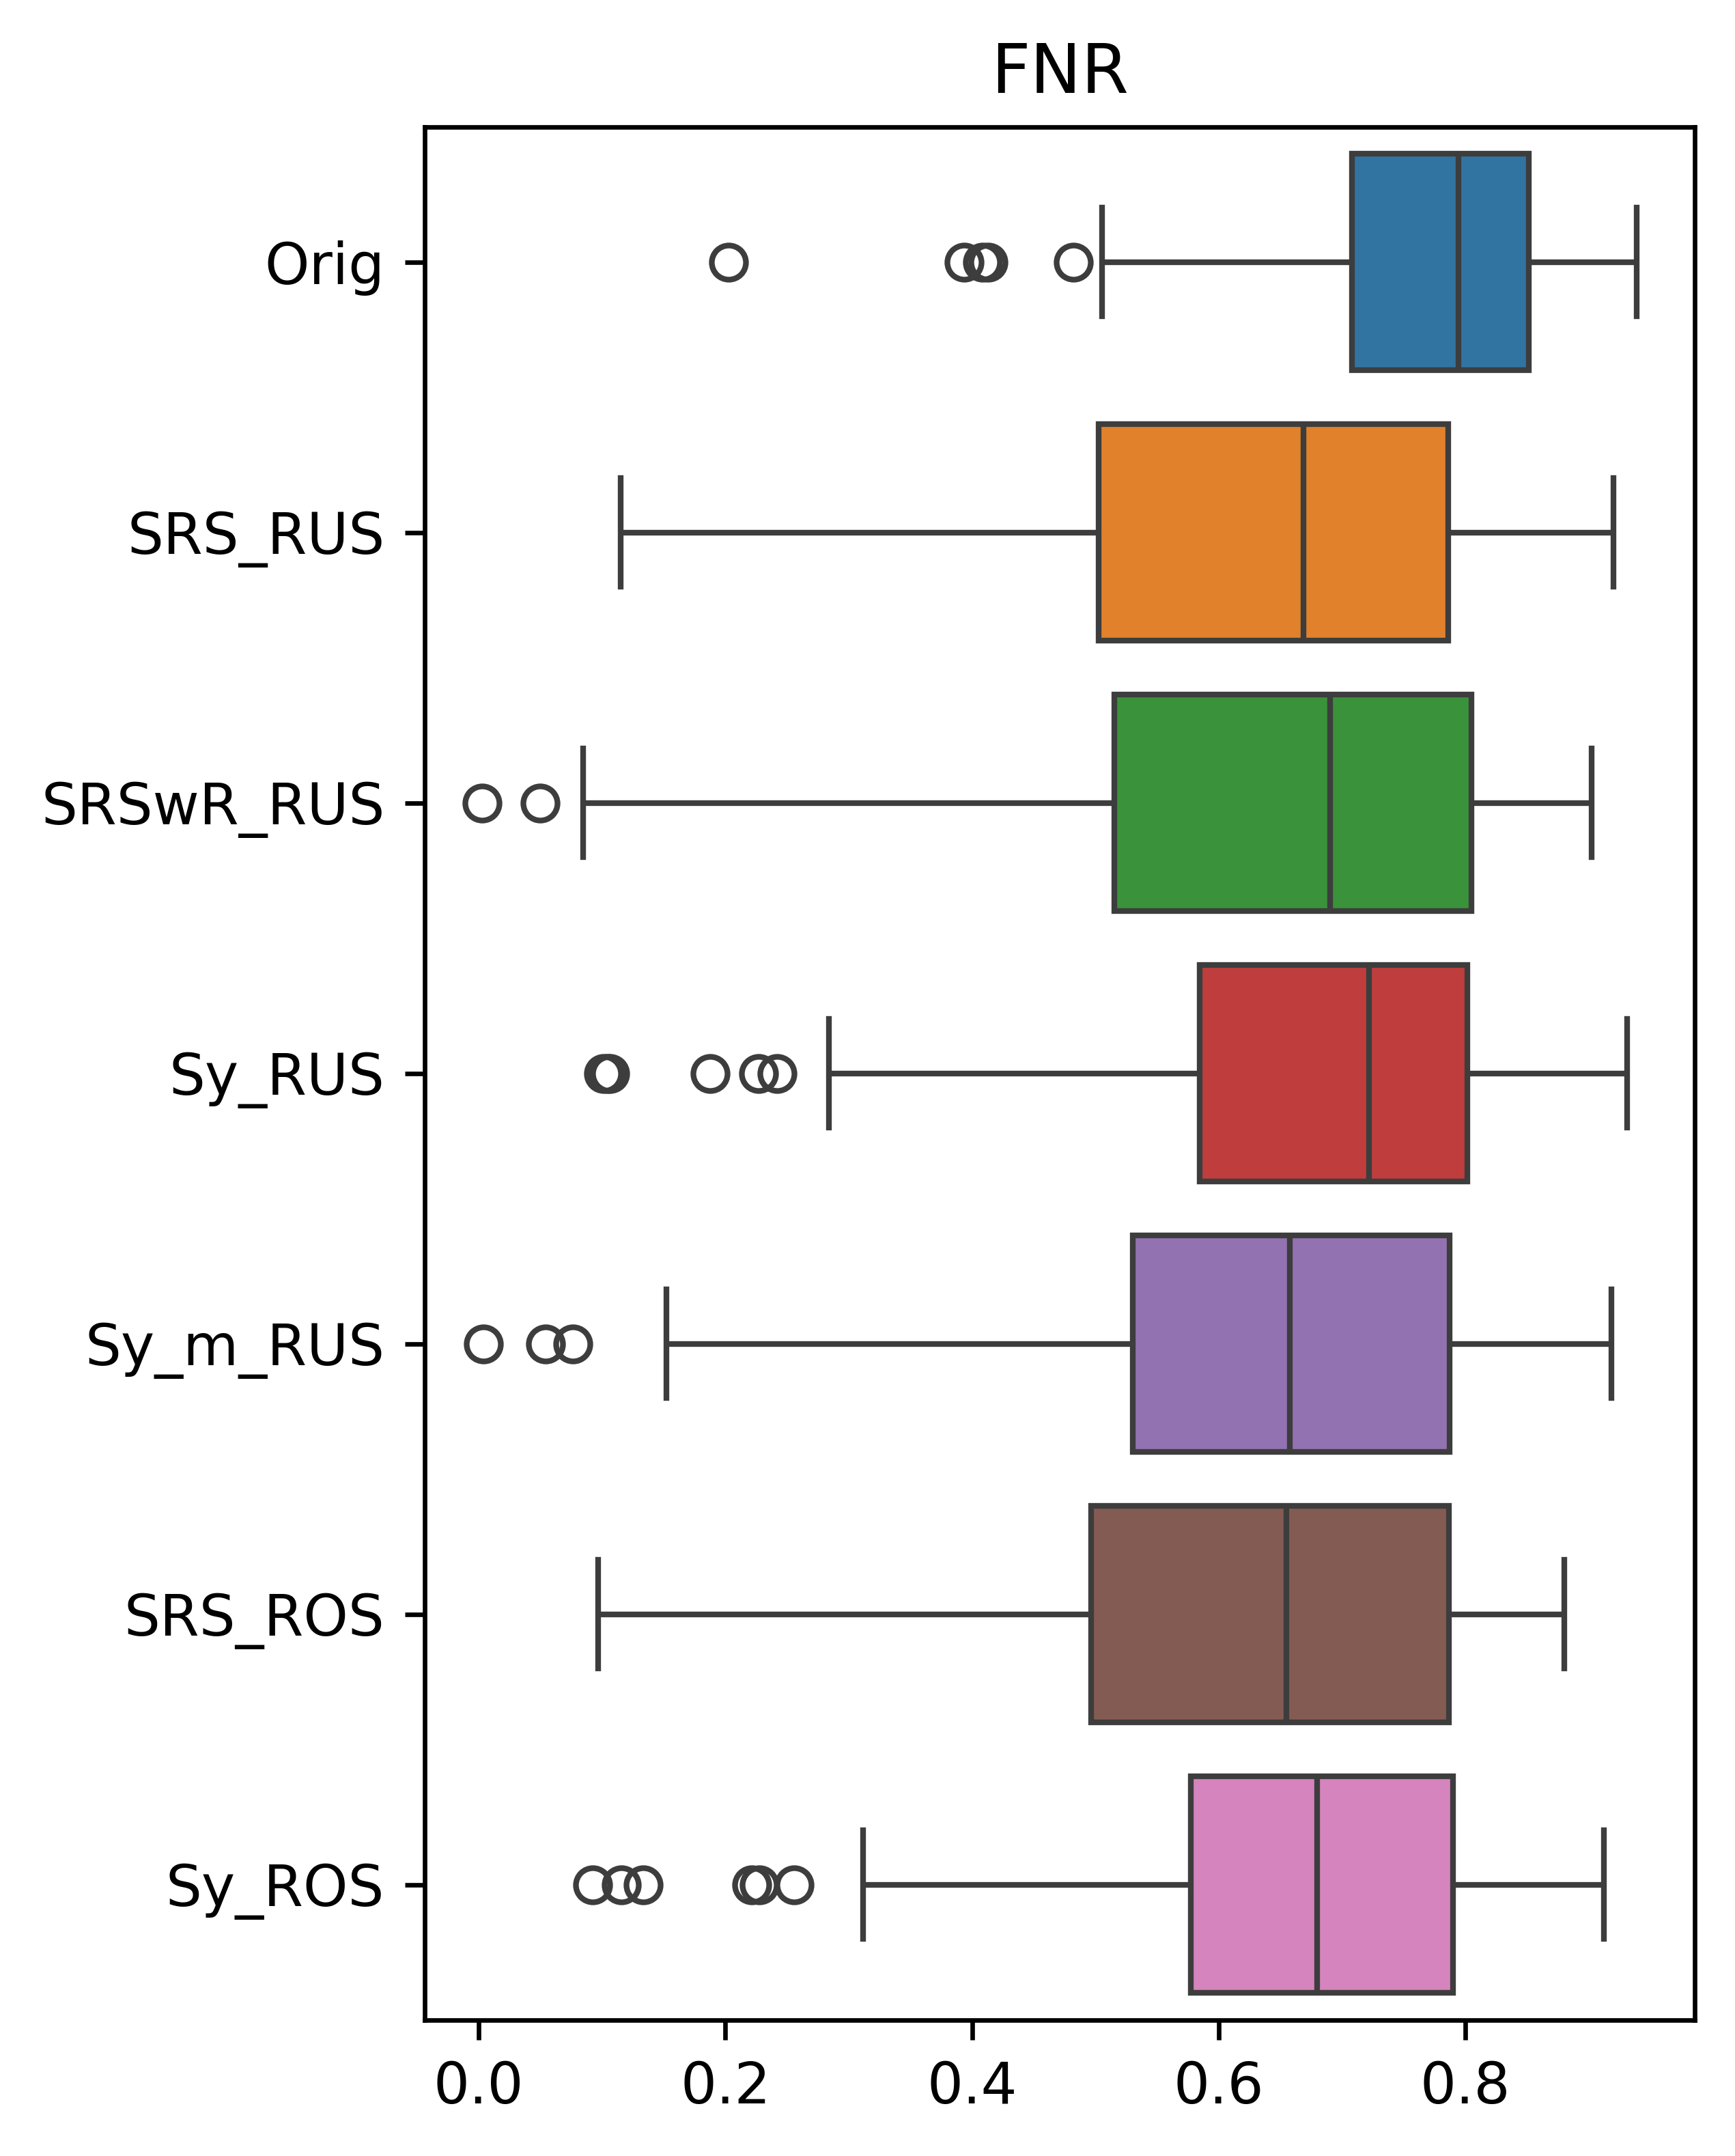

In [ ]:
dataset = FNR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FNR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [ ]:
Time = pd.DataFrame()

DF = Time


DF['SRS_RUS'] = SRS_time
DF['SRSwR_RUS'] = SRSwR_time
DF['Sy_RUS'] = Sy_time
DF['Sy_m_RUS'] = Sy2_time
DF['SRS_ROS'] = SRS_ROS_time
DF['Sy_ROS'] = Sy_ROS_time
DF['Orig'] = orig_time
DF

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,18.303071,18.703268,17.672478,15.716550,35.905611,36.675036,27.933277
1,16.633857,15.576718,16.676453,16.782630,38.175787,35.367708,28.712227
2,17.355280,18.464155,14.218497,17.794265,33.481807,47.703464,25.479594
3,18.062277,17.129171,15.735478,15.260581,35.318498,36.282060,27.635633
4,15.994438,15.696891,15.604301,17.468869,28.161099,39.698375,27.254139
...,...,...,...,...,...,...,...
95,26.469433,24.764700,25.082689,25.945357,53.229615,51.294530,NaN
96,30.762998,26.020629,26.371564,26.598388,57.608066,49.584492,NaN
97,29.523205,25.657654,26.124461,25.674172,52.815952,66.481690,NaN
98,27.659301,26.689288,26.349040,24.195498,64.207344,50.759811,NaN


<Axes: title={'center': 'Training Time'}>

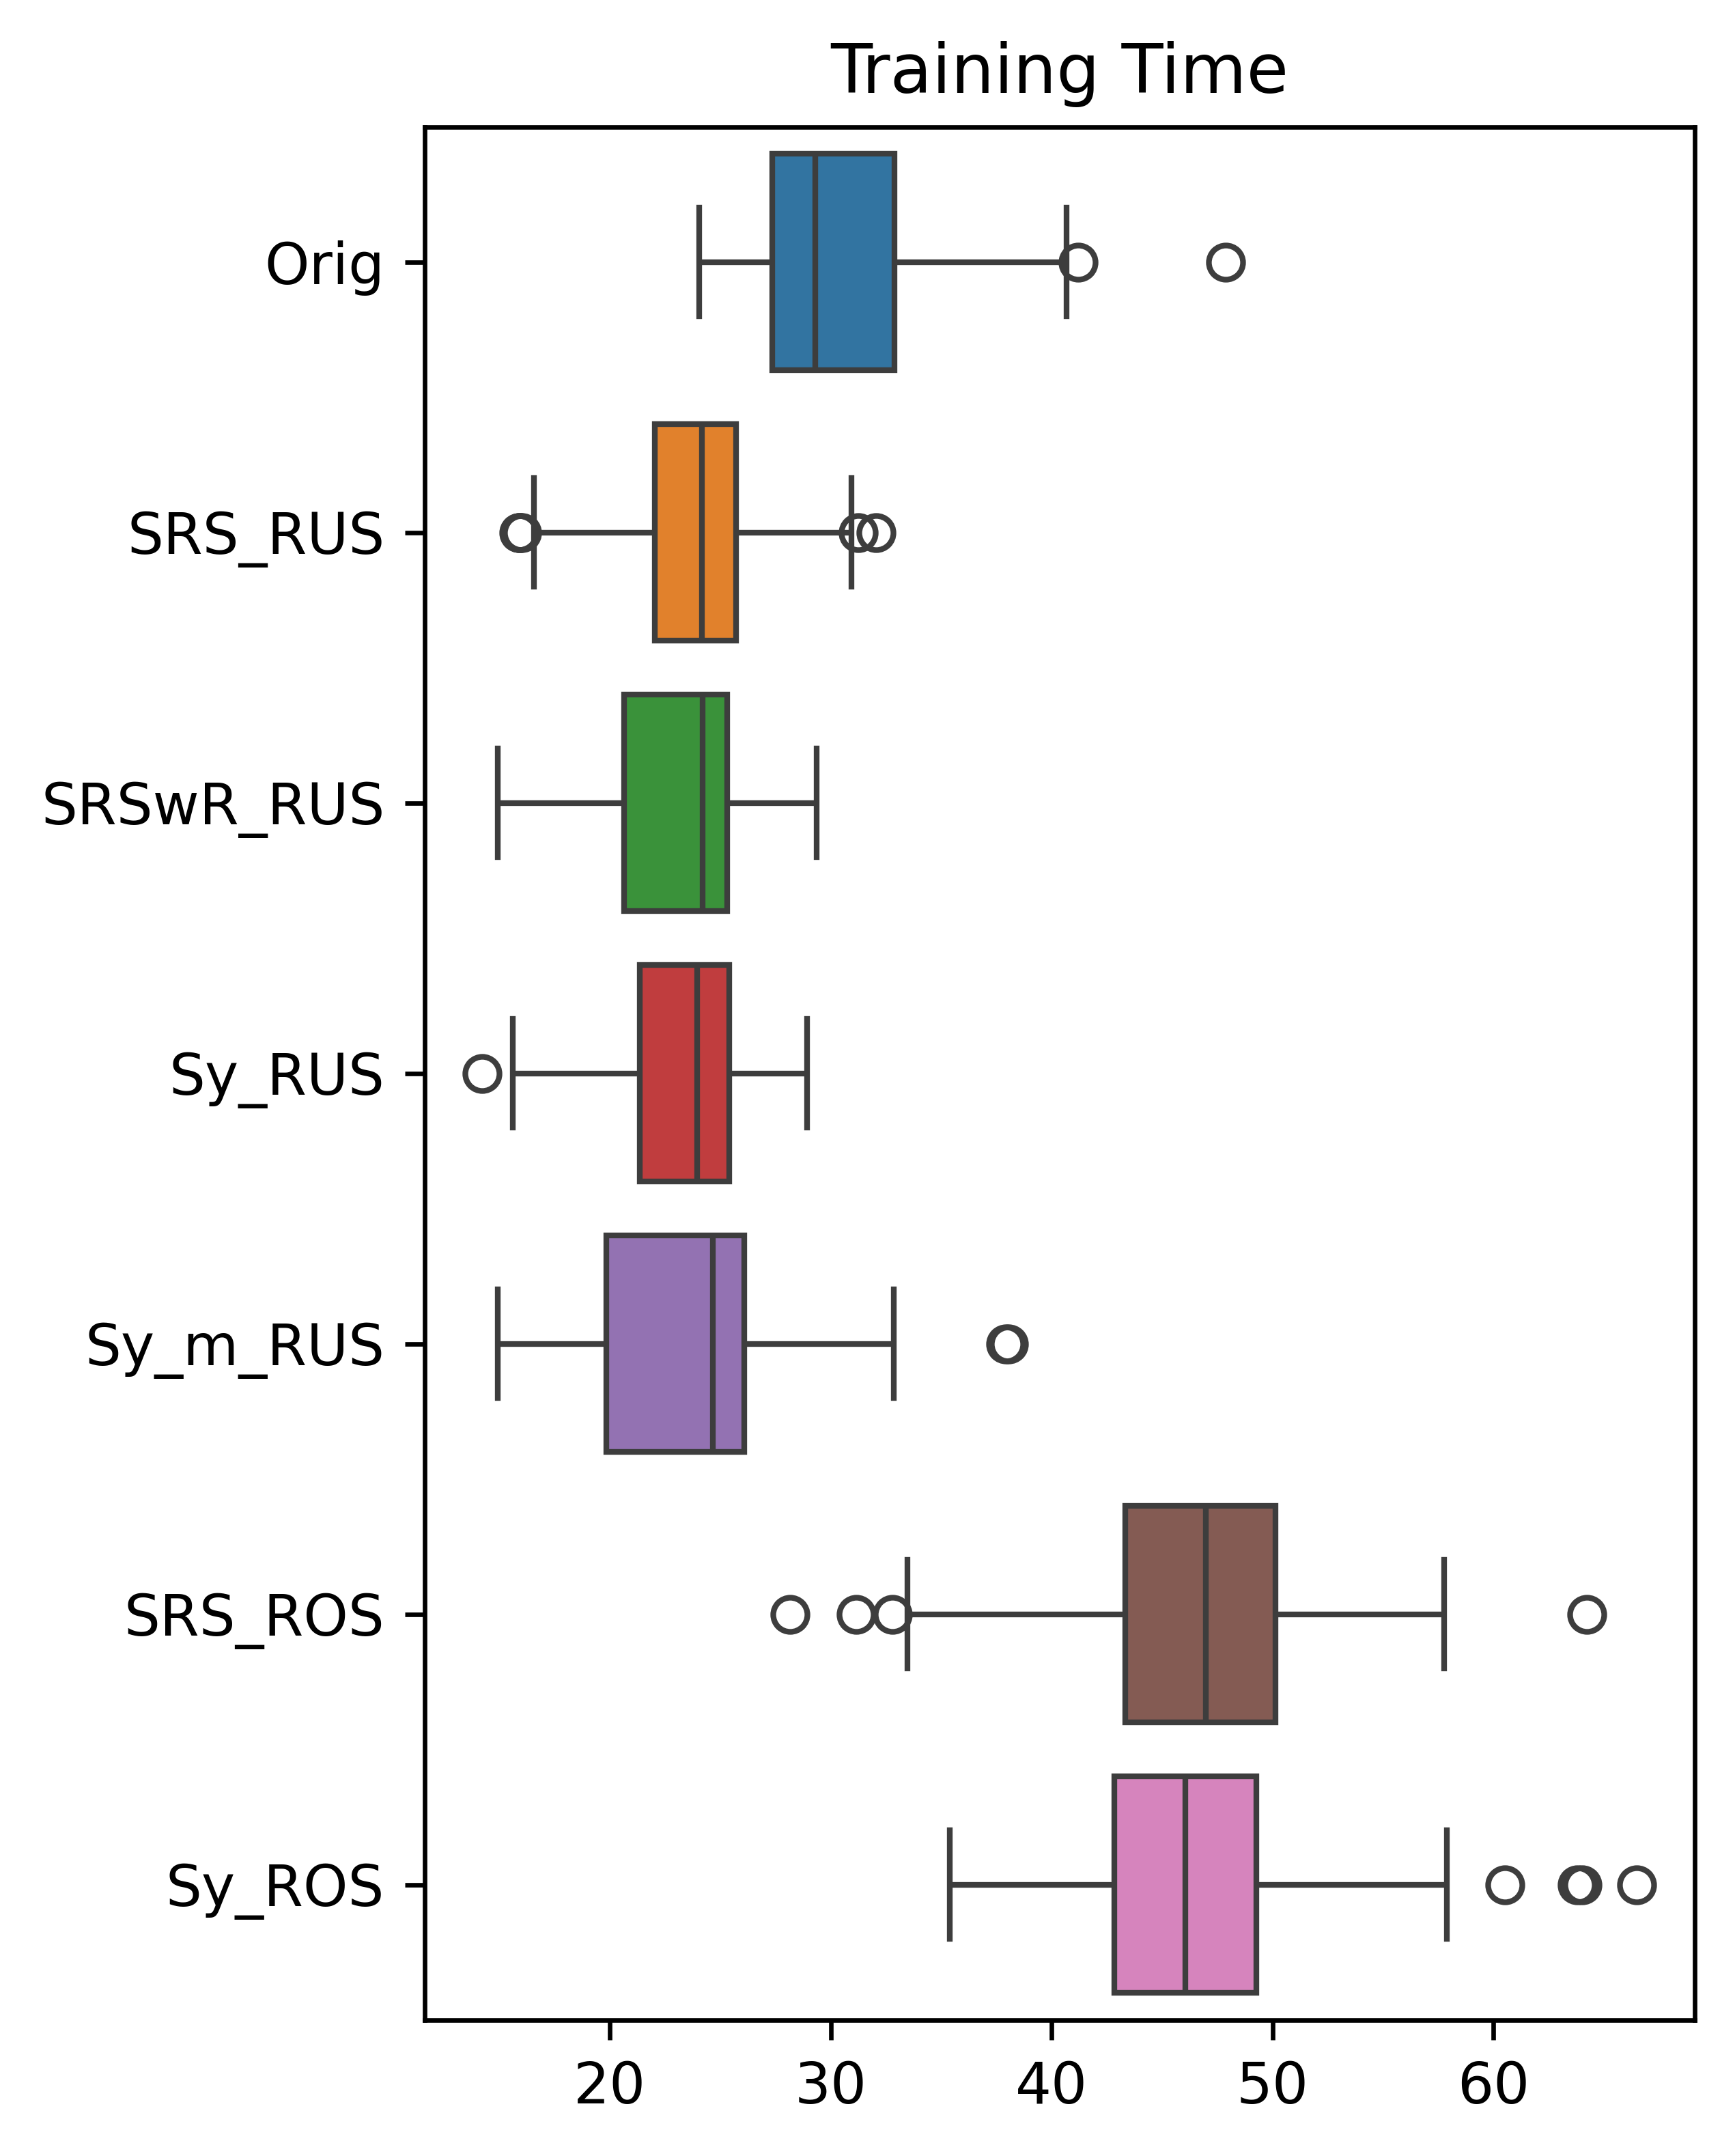

In [ ]:
dataset = DF

plt.figure(figsize=(4,6), dpi=600)
plt.title('Training Time')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')